**1. Load data**

In [11]:
method = 1
if method==1:
   x, y = datasets.make_classification(n_samples=500,      # Number of samples in the dataset
                                       n_features=3,       # Number of total features
                                       n_informative=2,    # Number of informative features
                                       n_redundant=0,      # Number of redundant features
                                       n_classes=2,        # Number of classes in the dataset (binary classification in this case)
                                       random_state=1)     # Seed for reproducibility)
   print(f"{x.shape=},\n{x=},\n{y=}")
elif method==2:
   iris = datasets.load_iris()
   x = iris.data
   y = iris.target
   print(f"{iris.data.shape=}, \n{iris.feature_names=}, \n{iris.target_names=},\n{iris.data=},\n{iris.target}")

x.shape=(500, 3),
x=array([[ 1.88986528, -0.64863577, -2.1602489 ],
       [-1.34856898,  0.55826422,  0.90963351],
       [ 1.34032355,  1.11548937,  0.70083457],
       ...,
       [-1.0205182 , -1.50489128, -1.61092141],
       [-0.69899664, -1.47958003, -1.74482983],
       [ 1.18585255,  0.47153427,  0.84682878]]),
y=array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 

**2. Data preparation**

In [167]:
df = pd.DataFrame(x)
df.head(6)

,0,1,2
0,1.889865,-0.648636,-2.160249
1,-1.348569,0.558264,0.909634
2,1.340324,1.115489,0.700835
3,0.354304,-0.070950,0.123171
4,1.162551,-3.016032,0.872561
5,-1.145507,-1.149723,0.041978


In [168]:
df['class'] = y
df.head(6)

,0,1,2,class
0,1.889865,-0.648636,-2.160249,0
1,-1.348569,0.558264,0.909634,1
2,1.340324,1.115489,0.700835,1
3,0.354304,-0.070950,0.123171,0
4,1.162551,-3.016032,0.872561,1
5,-1.145507,-1.149723,0.041978,0


In [169]:
print(f"\n {df.values=}")
print(f"\n {df.index=}")
print(f"\n {df.value_counts=}")
print(f"\n {df.describe()=}")


 df.values=array([[ 1.88986528, -0.64863577, -2.1602489 ,  0.        ],
       [-1.34856898,  0.55826422,  0.90963351,  1.        ],
       [ 1.34032355,  1.11548937,  0.70083457,  1.        ],
       ...,
       [-1.0205182 , -1.50489128, -1.61092141,  0.        ],
       [-0.69899664, -1.47958003, -1.74482983,  0.        ],
       [ 1.18585255,  0.47153427,  0.84682878,  1.        ]])

 df.index=RangeIndex(start=0, stop=500, step=1)

 df.value_counts=<bound method DataFrame.value_counts of             0         1         2  class
0    1.889865 -0.648636 -2.160249      0
1   -1.348569  0.558264  0.909634      1
2    1.340324  1.115489  0.700835      1
3    0.354304 -0.070950  0.123171      0
4    1.162551 -3.016032  0.872561      1
..        ...       ...       ...    ...
495 -0.755956  0.321326  0.979013      1
496 -0.228591 -1.037289  0.109650      1
497 -1.020518 -1.504891 -1.610921      0
498 -0.698997 -1.479580 -1.744830      0
499  1.185853  0.471534  0.846829      1

[500 rows

**3. Split data**

In [170]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=1)
print(f"{x_train.shape}")
print(f"{x_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")

(350, 3)
(150, 3)
(350,)
(150,)


**4. Classification**

In [171]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
P = model.predict_proba(x_test)
print(f"{P.shape = }")

P.shape = (150, 2)


In [173]:
auc = metrics.roc_auc_score(y_test, P[:,1])
print(f"{auc = }")
fpr, tpr, thresholds = metrics.roc_curve(y_test, P[:, 1])

auc = 0.9640633339263476


**Plot**

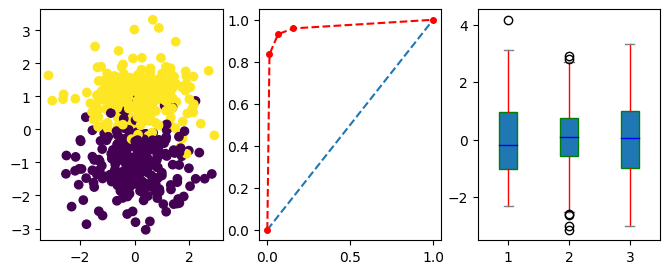

In [184]:
_, axs= plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
axs[0].scatter(df.iloc[:,1], df.iloc[:,2], c=df["class"])
axs[1].plot([0, 1], [0, 1], linestyle='--')
axs[1].plot(fpr, tpr, 'r--o', markersize=4)
# df.iloc[:,:3].plot.box(color={'boxes': 'Green', 'whiskers': 'red','medians': 'Blue', 'caps': 'Gray'},ax=axs[2])
axs[2].boxplot(x, boxprops=dict(color='green'), whiskerprops=dict(color='red'), medianprops=dict(color='blue'), capprops=dict(color='gray'), patch_artist=True)
plt.autoscale(axis="x", tight=True, enable=True)

In [ ]:
n,bins,_= plt.hist(x[:,0], bins=20,edgecolor='black',normed=1)
y=mlab.normpdf(bins,100,15)
plt.plot(bins,y,'r')


In [188]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab  # For normpdf

# Assuming x is your data
x = np.random.randn(100)

n, bins, _ = plt.hist(x[:, 0], bins=20, edgecolor='black', density=True)
y = mlab.normpdf(bins, 100, 15)
plt.plot(bins, y, 'r')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Histogram with Normal Distribution Fit')



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

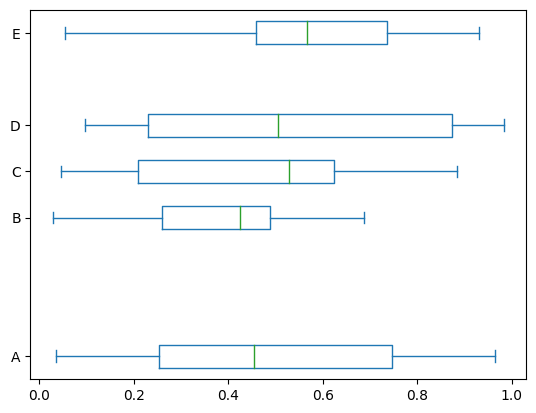

In [138]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

In [ ]:
n,bins,_= plt.hist(x, bins=20,edgecolor='black',normed=1)
y=mlab.normpdf(bins,100,15)
plt.plot(bins,y,'r')

**Confusion matrix**<br/>

![Confusion Matrix.JPG](<attachment:Confusion Matrix.JPG>)

- `True Positive (TP)`: The number of instances correctly predicted as positive (actual class is positive, and the model predicted it as positive).
- `True Negative (TN):` The number of instances correctly predicted as negative (actual class is negative, and the model predicted it as negative).
- `False Positive (FP):` Also known as a Type I error, it is the number of instances incorrectly predicted as positive (actual class is negative, but the model predicted it as positive).
- `False Negative (FN):` Also known as a Type II error, it is the number of instances incorrectly predicted as negative (actual class is positive, but the model predicted it as negative).
- `Accuracy:` (TP + TN) / (TP + TN + FP + FN)
- `Precision:` TP / (TP + FP)
- `Recall (Sensitivity or True positive rate (TPR)):` TP / (TP + FN)
- `Specificity (True negetive rate (TNR)):` TN / (TN + FP)
- `F1 Score:` (1 - Specificity) or (2 * (Precision * Recall) / (Precision + Recall))


|  |Predicted Class 0|Predicted Class 1|Predicted Class 2|       
|:---:|:----:|:---:|:---:|                                                      
|Actual Class 0|  C00 |   C01 |   C02|
|Actual Class 1|  C10 |   C11 |   C12|
|Actual Class 2|  C20|   C21|     C22| 

<br/>


| |Precision|Recall (Sensitivity)|F1 Score|
|:---:|:----:|:---:|:---:|    
|Class 0:|$C_{00} / (C_{00} + C_{10} + C_{20})$|$C_{00} / (C_{00} + C_{01} + C_{02})$|$2 * Precision_{0} * Recall_{0} / (Precision_{0} + Recall_{0})$|
|Class 1:|$C_{11} / (C_{01} + C_{11} + C_{21})$|$C_{11} / (C_{10} + C_{11} + C_{12})$|$2 * Precision_{1} * Recall_{1} / (Precision_{1} + Recall_{1})$|
|Class 2:|$C_{22} / (C_{02} + C_{12} + C_{22})$|$C_{22} / (C_{20} + C_{21} + C_{22})$|$2 * Precision_{2} * Recall_{2} / (Precision_{2} + Recall_{2})$|

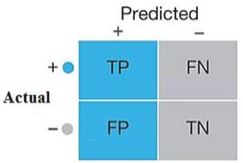

In [ ]:
c=metrics.confusion_matrix(actual,predicted,labels=["spam","real"])
acc=metrics.accuracy_score(actual,predicted)
cr= metrics.classification_report(actual,predicted)